In [1]:
from utils import *
from utils import __HW_LIST, __CPUS_ONLY, __GPUS_ONLY
hw_list = __HW_LIST
cpus_only = __CPUS_ONLY
gpus_only = __GPUS_ONLY

%config InlineBackend.figure_formats = ['svg']

In [2]:
############
############
# Adastra
############
# df_mi250 = pd.read_csv("log/describe_all_adastra_gpu.csv") #MI250x
# df_epyc = pd.read_csv("log/describe_all_cpu_epyc.csv") #AMD EPYC 7A53 64-Core Processor
# df_genoa = pd.read_csv("log/describe_genoa_acpp.csv")
df_mi250 = pd.read_csv("log/PAPER/ACPP/describe_mi250_acpp.csv")
df_epyc = pd.read_csv("log/PAPER/ACPP/describe_epyc_acpp.csv")
df_genoa = pd.read_csv("log/PAPER/ACPP/describe_genoa_acpp.csv")

############
# DPCPP
# df_dpcpp_epyc  = pd.read_csv("log/dpcpp/describe_epyc_dpcpp.csv")
# df_dpcpp_genoa = pd.read_csv("log/dpcpp/describe_genoa_dpcpp.csv")
# df_dpcpp_mi250 = pd.read_csv("log/dpcpp/describe_mi250_dpcpp.csv")
df_dpcpp_epyc  = pd.read_csv("log/PAPER/DPCPP/describe_epyc_dpcpp.csv")
df_dpcpp_genoa = pd.read_csv("log/PAPER/DPCPP/describe_genoa_dpcpp.csv")
df_dpcpp_mi250 = pd.read_csv("log/PAPER/DPCPP/describe_mi250_dpcpp.csv")

############
############
# Ruche
############
# df_a100  = pd.read_csv("log/describe_all_ruche_gpu.csv")
# df_xeon  = pd.read_csv("log/describe_all_ruche_cpu.csv")
# df_a100  = pd.read_csv("log/new-runs/describe_a100.csv")
df_a100  = pd.read_csv("log/PAPER/ACPP/describe_a100_acpp.csv")
df_xeon  = pd.read_csv("log/new-runs/describe_xeon.csv")

############
# DPCPP
# df_dpcpp_a100  = pd.read_csv("log/dpcpp/describe_ruche_dpcpp_gpu.csv")
df_dpcpp_a100  = pd.read_csv("log/PAPER/DPCPP/describe_a100_dpcpp.csv")
df_dpcpp_xeon  = pd.read_csv("log/dpcpp/describe_all_ruche_cpu_dpcpp.csv")


dfs = [df_mi250, df_epyc, df_a100, df_xeon, df_dpcpp_epyc, df_dpcpp_genoa, df_dpcpp_xeon, df_dpcpp_mi250, df_dpcpp_a100, df_genoa]
for df in dfs:
    df.drop(df[(df['error_mean']>10e-6)].index, inplace=True)
    df.drop(df[(df['error_mean'].isna())].index, inplace=True)
    df.drop(df[(df['error_mean'] == 0)].index, inplace=True)
    # df.drop(df[()].index, inplace=True)
    # df.dropna(axis = 0, how = 'all', inplace=True)

In [3]:
val_xeon = create_dict_from_df(df_xeon)
val_epyc  = create_dict_from_df(df_epyc)
val_genoa = create_dict_from_df(df_genoa)
val_mi250 = create_dict_from_df(df_mi250)
val_a100 = create_dict_from_df(df_a100)

val_xeon_dpcpp = create_dict_from_df(df_dpcpp_xeon)
val_epyc_dpcpp = create_dict_from_df(df_dpcpp_epyc)
val_genoa_dpcpp = create_dict_from_df(df_dpcpp_genoa)
val_mi250_dpcpp = create_dict_from_df(df_dpcpp_mi250)
val_a100_dpcpp = create_dict_from_df(df_dpcpp_a100)


In [4]:
#old function in read_pandas_csv.ipynb for 4 SUBPLOTS
# create_subplots([val_epyc, val_xeon, val_mi250, val_a100],
                # ["CPU EPYC acpp", "CPU Xeon Gold acpp", "GPU MI250 acpp", "GPU A100 acpp"])

In [5]:
# plot_values(val_epyc, "CPU EPYC acpp")
# plot_values(val_mi250, "GPU MI250 acpp")
# plot_values(val_xeon, "CPU Xeon Gold acpp")
# plot_values(val_a100, "GPU A100 acpp")
# plot_values(val_genoa, "CPU GENOA acpp")

# plot_values(val_xeon_dpcpp, "CPU Xeon Gold dpcpp")
# plot_values(val_epyc_dpcpp, "CPU EPYC dpcpp")
# plot_values(val_genoa_dpcpp, "CPU GENOA dpcpp")
# plot_values(val_mi250_dpcpp, "GPU MI250 dpcpp")
# plot_values(val_a100_dpcpp, "GPU A100 dpcpp")


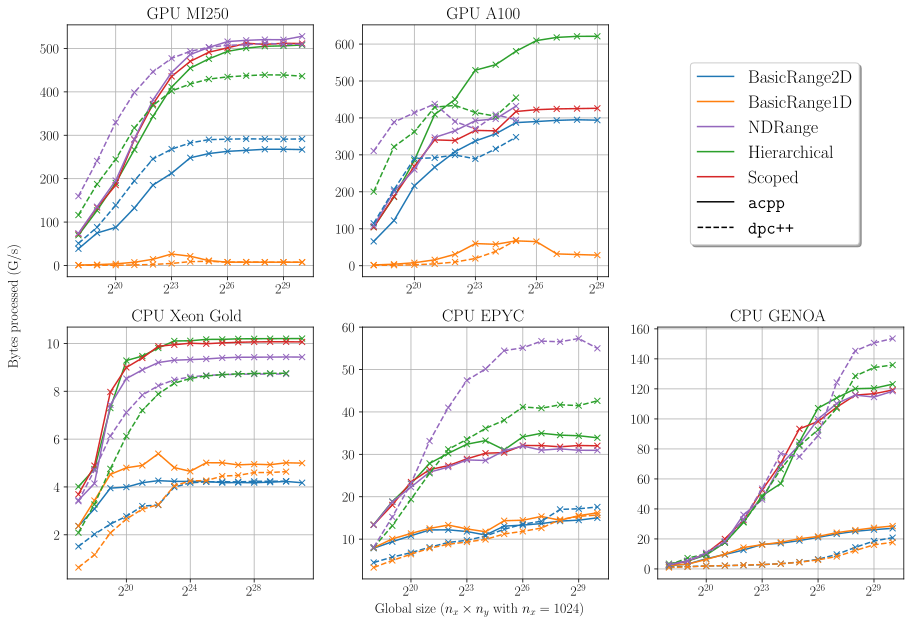

In [6]:
all_values=[
    #(val_acpp, val_dpcpp, title)
    (val_mi250, val_mi250_dpcpp, "GPU MI250"),
    (val_a100,  val_a100_dpcpp,  "GPU A100"),
    (val_xeon,  val_xeon_dpcpp,  "CPU Xeon Gold"),
    (val_epyc,  val_epyc_dpcpp,  "CPU EPYC"),
    (val_genoa, val_genoa_dpcpp, "CPU GENOA")
]

plot_all_general_perf(all_values)

# Perf portability

In [7]:
dfs_dpcpp = [df_dpcpp_mi250, df_dpcpp_a100, df_dpcpp_epyc, df_dpcpp_genoa, df_dpcpp_xeon]
dfs_acpp  = [df_mi250      , df_a100      , df_epyc      , df_genoa      , df_xeon]

PP_SIZE = 2**14

acpp_pp_values  = create_pp_values(dfs_acpp, PP_SIZE)
dpcpp_pp_values = create_pp_values(dfs_dpcpp, PP_SIZE)

pp_acpp , pp_acpp_cpu , pp_acpp_gpu  = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}
pp_dpcpp, pp_dpcpp_cpu, pp_dpcpp_gpu = {"arch":"", "app":""}, {"arch":"", "app":""}, {"arch":"", "app":""}

#all subset: cpus and gpus
pp_acpp["arch"] , pp_acpp["app"]          = compute_pp(acpp_pp_values,  hw_list, do_print=False)
pp_dpcpp["arch"], pp_dpcpp["app"]         = compute_pp(dpcpp_pp_values, hw_list, do_print=False)

#only cpus
pp_acpp_cpu["arch"] , pp_acpp_cpu["app"]  = compute_pp(acpp_pp_values,  cpus_only, do_print=False)
pp_dpcpp_cpu["arch"], pp_dpcpp_cpu["app"] = compute_pp(dpcpp_pp_values, cpus_only, do_print=False)

#only gpus
pp_acpp_gpu["arch"] , pp_acpp_gpu["app"]  = compute_pp(acpp_pp_values,  gpus_only, do_print=False)
pp_dpcpp_gpu["arch"], pp_dpcpp_gpu["app"] = compute_pp(dpcpp_pp_values, gpus_only, do_print=False)

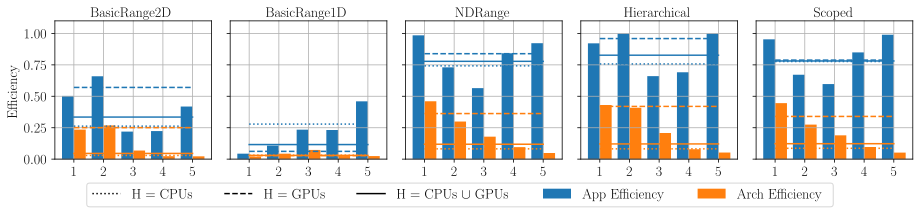

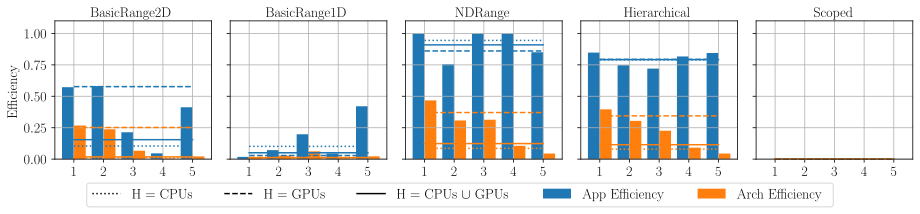

In [8]:
plot_pp(acpp_pp_values, pp_acpp_cpu, pp_acpp_gpu, pp_acpp)
plot_pp(dpcpp_pp_values, pp_dpcpp_cpu, pp_dpcpp_gpu, pp_dpcpp)